# 准备数据

In [1]:
# 过滤Alphalens的warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [3]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [4]:
# 设置任务参数
name = "300_lgb"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [5]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [6]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm
)
from vnpy.alpha.dataset.datasets.alpha_158 import Alpha158

In [7]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [8]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inte ┆ vwap      ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ rest      ┆ ---       ┆ ---       │
│ datetime[μ ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64        ┆ ---       ┆ f64       ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f64       ┆           ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2007-09-24 ┆ 1.034398 ┆ 1.034654 ┆ 0.989383 ┆ … ┆ 2.4512e7   ┆ 0.0       ┆ 6.656827  ┆ 002032.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2007-09-25 ┆ 1.019142 ┆ 1.019142 ┆ 0.984985 ┆ … ┆ 1.9136e7   ┆ 0.0       ┆ 6.576273  ┆ 002032.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2007-09-26 ┆ 0.995858 ┆ 1.032063 ┆ 0.982922 ┆ … ┆ 5.0267e7   ┆ 0.0       ┆ 6.61489   ┆ 002032.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2007-09-27 ┆ 1.002319 ┆ 1.003614 ┆ 0.983434 ┆ … ┆ 1.3255e7   ┆ 0.0       ┆ 6.573962  ┆ 002032.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2007-09-28 ┆ 1.008524 ┆ 1.070346 ┆ 0.995858 ┆ … ┆ 6.1575102e ┆ 0.0       ┆ 6.92347   ┆ 002032.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-01-04 ┆ 1.589241 ┆ 1.592603 ┆ 1.569067 ┆ … ┆ 1.7223e8   ┆ 0.0       ┆ 14.070705 ┆ 000712.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2024-01-05 ┆ 1.570188 ┆ 1.583637 ┆ 1.536565 ┆ … ┆ 2.6369e8   ┆ 0.0       ┆ 13.911782 ┆ 000712.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2024-01-08 ┆ 1.536565 ┆ 1.55898  ┆ 1.521995 ┆ … ┆ 1.9567e8   ┆ 0.0       ┆ 13.74859  ┆ 000712.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2024-01-09 ┆ 1.545531 ┆ 1.556739 ┆ 1.509667 ┆ … ┆ 2.2625e8   ┆ 0.0       ┆ 13.673365 ┆ 000712.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
│ 2024-01-10 ┆ 1.504063 ┆ 1.527599 ┆ 1.491734 ┆ … ┆ 1.7340e8   ┆ 0.0       ┆ 13.44462  ┆ 000712.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ SE        │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [9]:
# 创建数据集对象
dataset: AlphaDataset = Alpha158(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [10]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor("learn", partial(process_cs_norm, names=["label"], method="zscore"))

In [11]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [12]:
# 准备特征和标签数据
dataset.prepare_data(filters, max_workers=6)

2025-12-24 14:01:02 开始计算表达式因子特征


100%|██████████| 159/159 [57:03<00:00, 21.53s/it]  


2025-12-24 14:58:07 开始合并结果数据因子特征


0it [00:00, ?it/s]


2025-12-24 14:58:09 开始筛选成分股数据


100%|██████████| 819/819 [00:07<00:00, 109.48it/s]


factor:
datetime    vt_symbol  
2008-01-02  000001.SZSE    0.433571
            000002.SZSE    0.824953
            000009.SZSE    0.833127
            000012.SZSE    0.573703
            000021.SZSE    0.924513
                             ...   
2020-08-31  603799.SSE     0.331769
            603833.SSE     0.273218
            603899.SSE     0.662555
            603986.SSE     0.595141
            603993.SSE     0.580442
Name: rsv_5, Length: 924593, dtype: float64
prices:
vt_symbol   000001.SZSE  000002.SZSE  000008.SZSE  000009.SZSE  000012.SZSE  \
datetime                                                                      
2008-01-02     0.996592     0.941916          NaN     1.166547     0.836215   
2008-01-03     0.980066     0.919331          NaN     1.149026     0.888119   
2008-01-04     1.006828     0.943533          NaN     1.149765     0.940786   
2008-01-07     1.027812     0.973863          NaN     1.123460     0.940405   
2008-01-08     1.059827     0.964184          

min       max      mean       std  count    count %
factor_quantile                                                          
1.0              0.000000  0.861320  0.118378  0.149604  89010  10.000124
2.0              0.001492  0.929111  0.252819  0.195026  89010  10.000124
3.0              0.010163  0.966846  0.326492  0.216484  89010  10.000124
4.0              0.016945  0.992620  0.388273  0.227562  89007   9.999787
5.0              0.025167  1.000000  0.446858  0.231919  89010  10.000124
6.0              0.036461  1.000000  0.506670  0.230664  89005   9.999562
7.0              0.052632  1.000000  0.571749  0.223189  89007   9.999787
8.0              0.073814  1.000000  0.645598  0.207631  89010  10.000124
9.0              0.109371  1.000000  0.736056  0.178881  89010  10.000124
10.0             0.175010  1.000000  0.870920  0.128105  89010  10.000124

Returns Analysis


1D     5D    10D
Ann. alpha                                     0.030 -0.069 -0.021
beta                                           0.014  0.009  0.020
Mean Period Wise Return Top Quantile (bps)     4.822 -4.147 -1.498
Mean Period Wise Return Bottom Quantile (bps) -3.183  0.728 -0.761
Mean Period Wise Spread (bps)                  8.004 -4.858 -0.696

<Figure size 640x480 with 0 Axes>

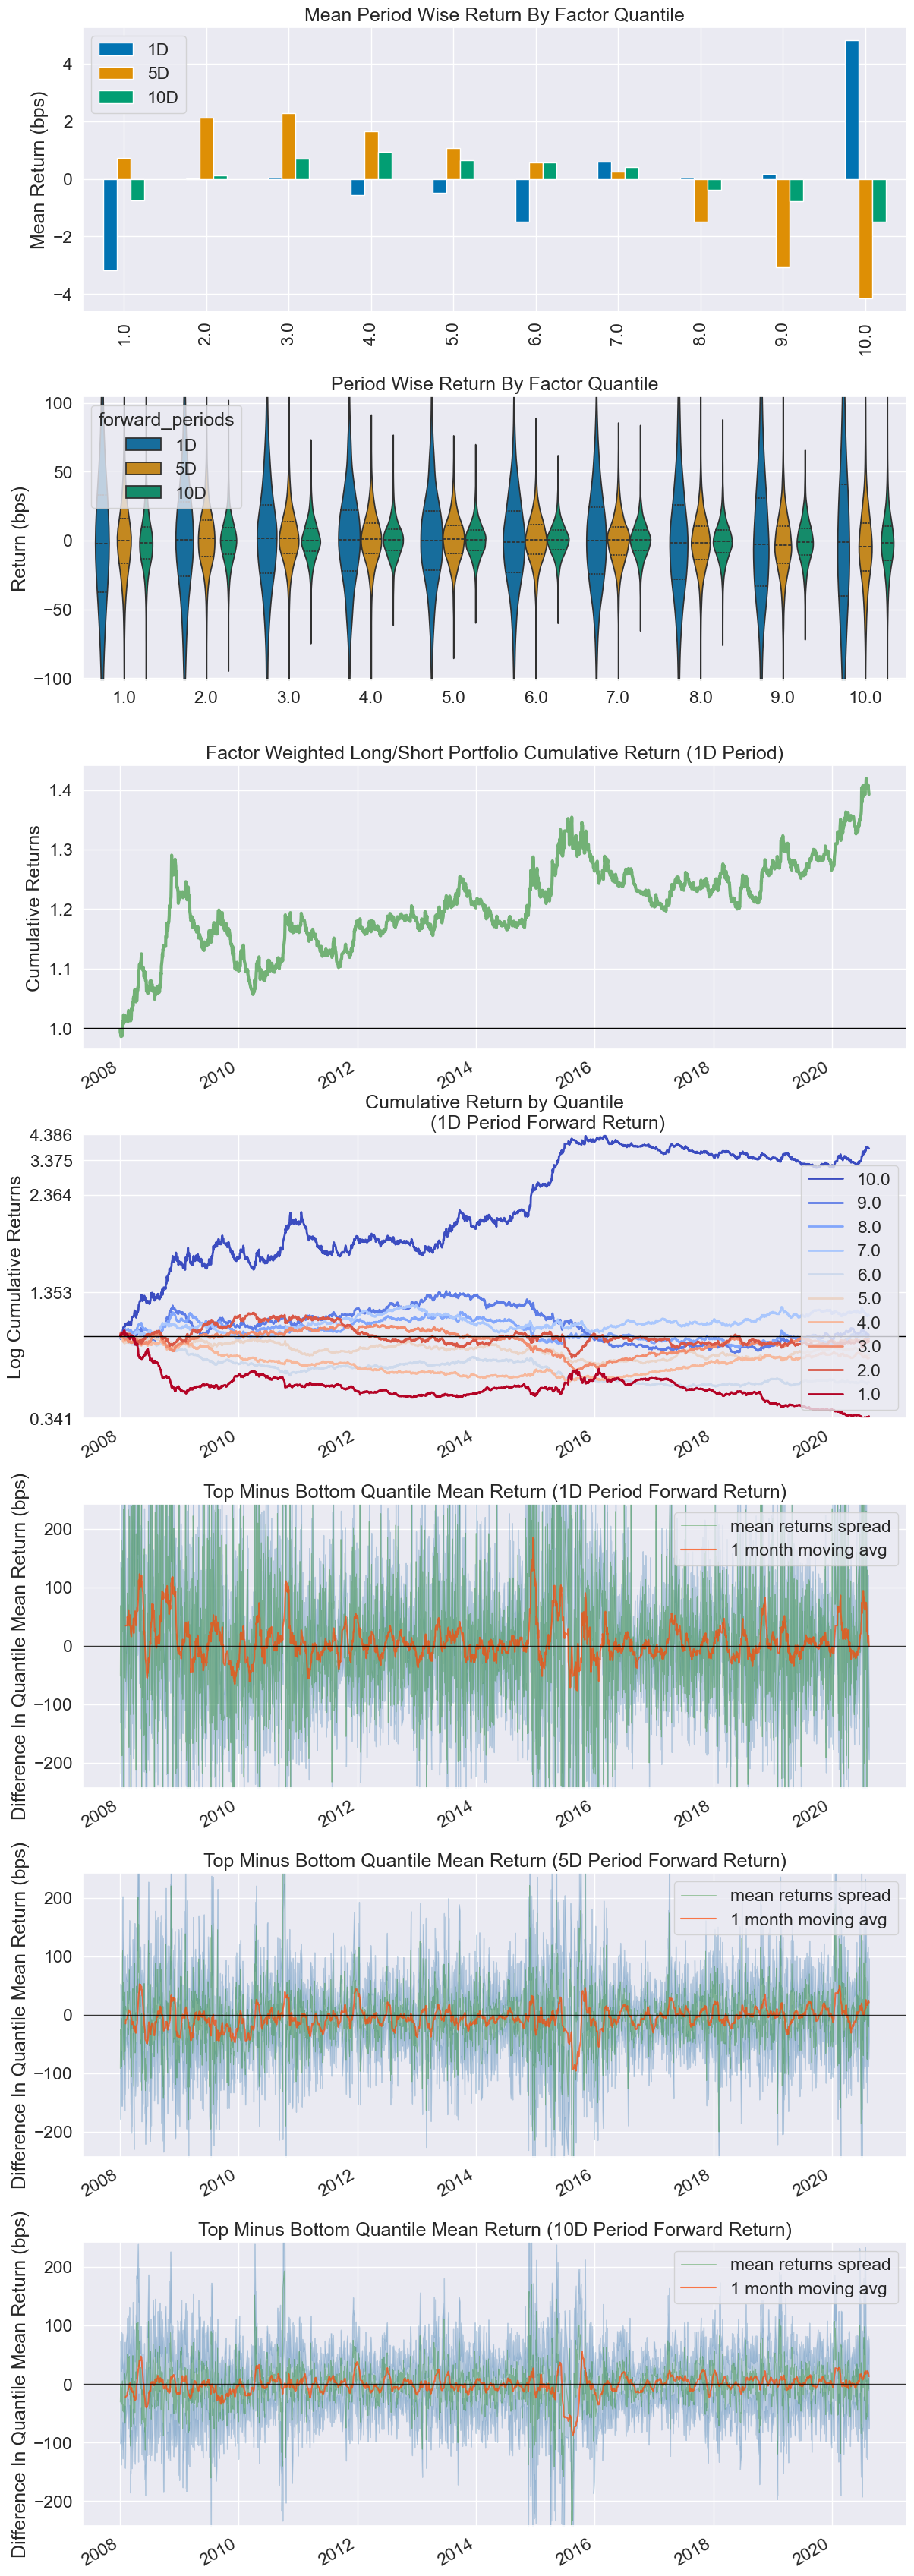

Information Analysis


1D     5D    10D
IC Mean          -0.034 -0.037 -0.013
IC Std.           0.160  0.150  0.148
Risk-Adjusted IC -0.214 -0.244 -0.085
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

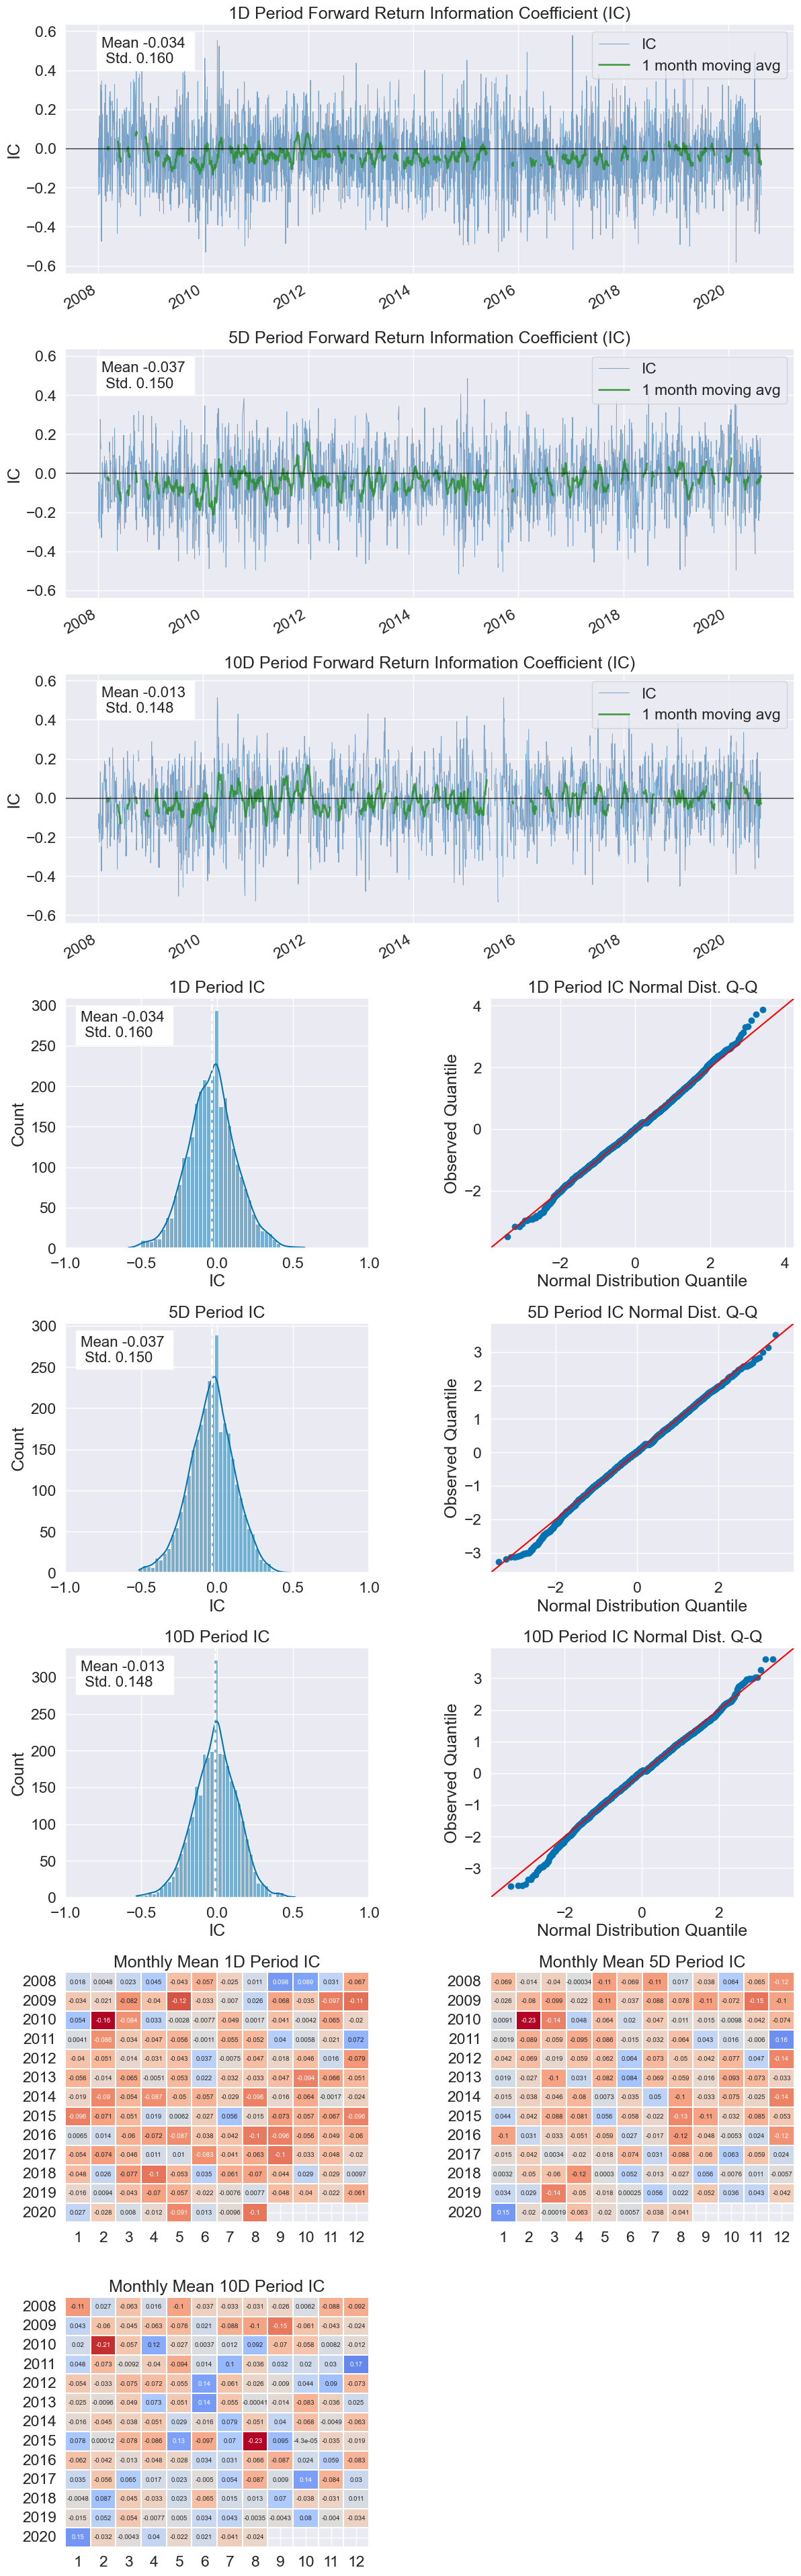

d:\veighna_studio\Lib\site-packages\alphalens\utils.py:932: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover    0.533  0.746  0.754
Quantile 2.0 Mean Turnover    0.767  0.905  0.896
Quantile 3.0 Mean Turnover    0.827  0.899  0.896
Quantile 4.0 Mean Turnover    0.850  0.896  0.895
Quantile 5.0 Mean Turnover    0.860  0.896  0.896
Quantile 6.0 Mean Turnover    0.861  0.895  0.896
Quantile 7.0 Mean Turnover    0.856  0.900  0.897
Quantile 8.0 Mean Turnover    0.837  0.900  0.899
Quantile 9.0 Mean Turnover    0.795  0.900  0.894
Quantile 10.0 Mean Turnover   0.674  0.897  0.887

1D     5D    10D
Mean Factor Rank Autocorrelation  0.583  0.011  0.056

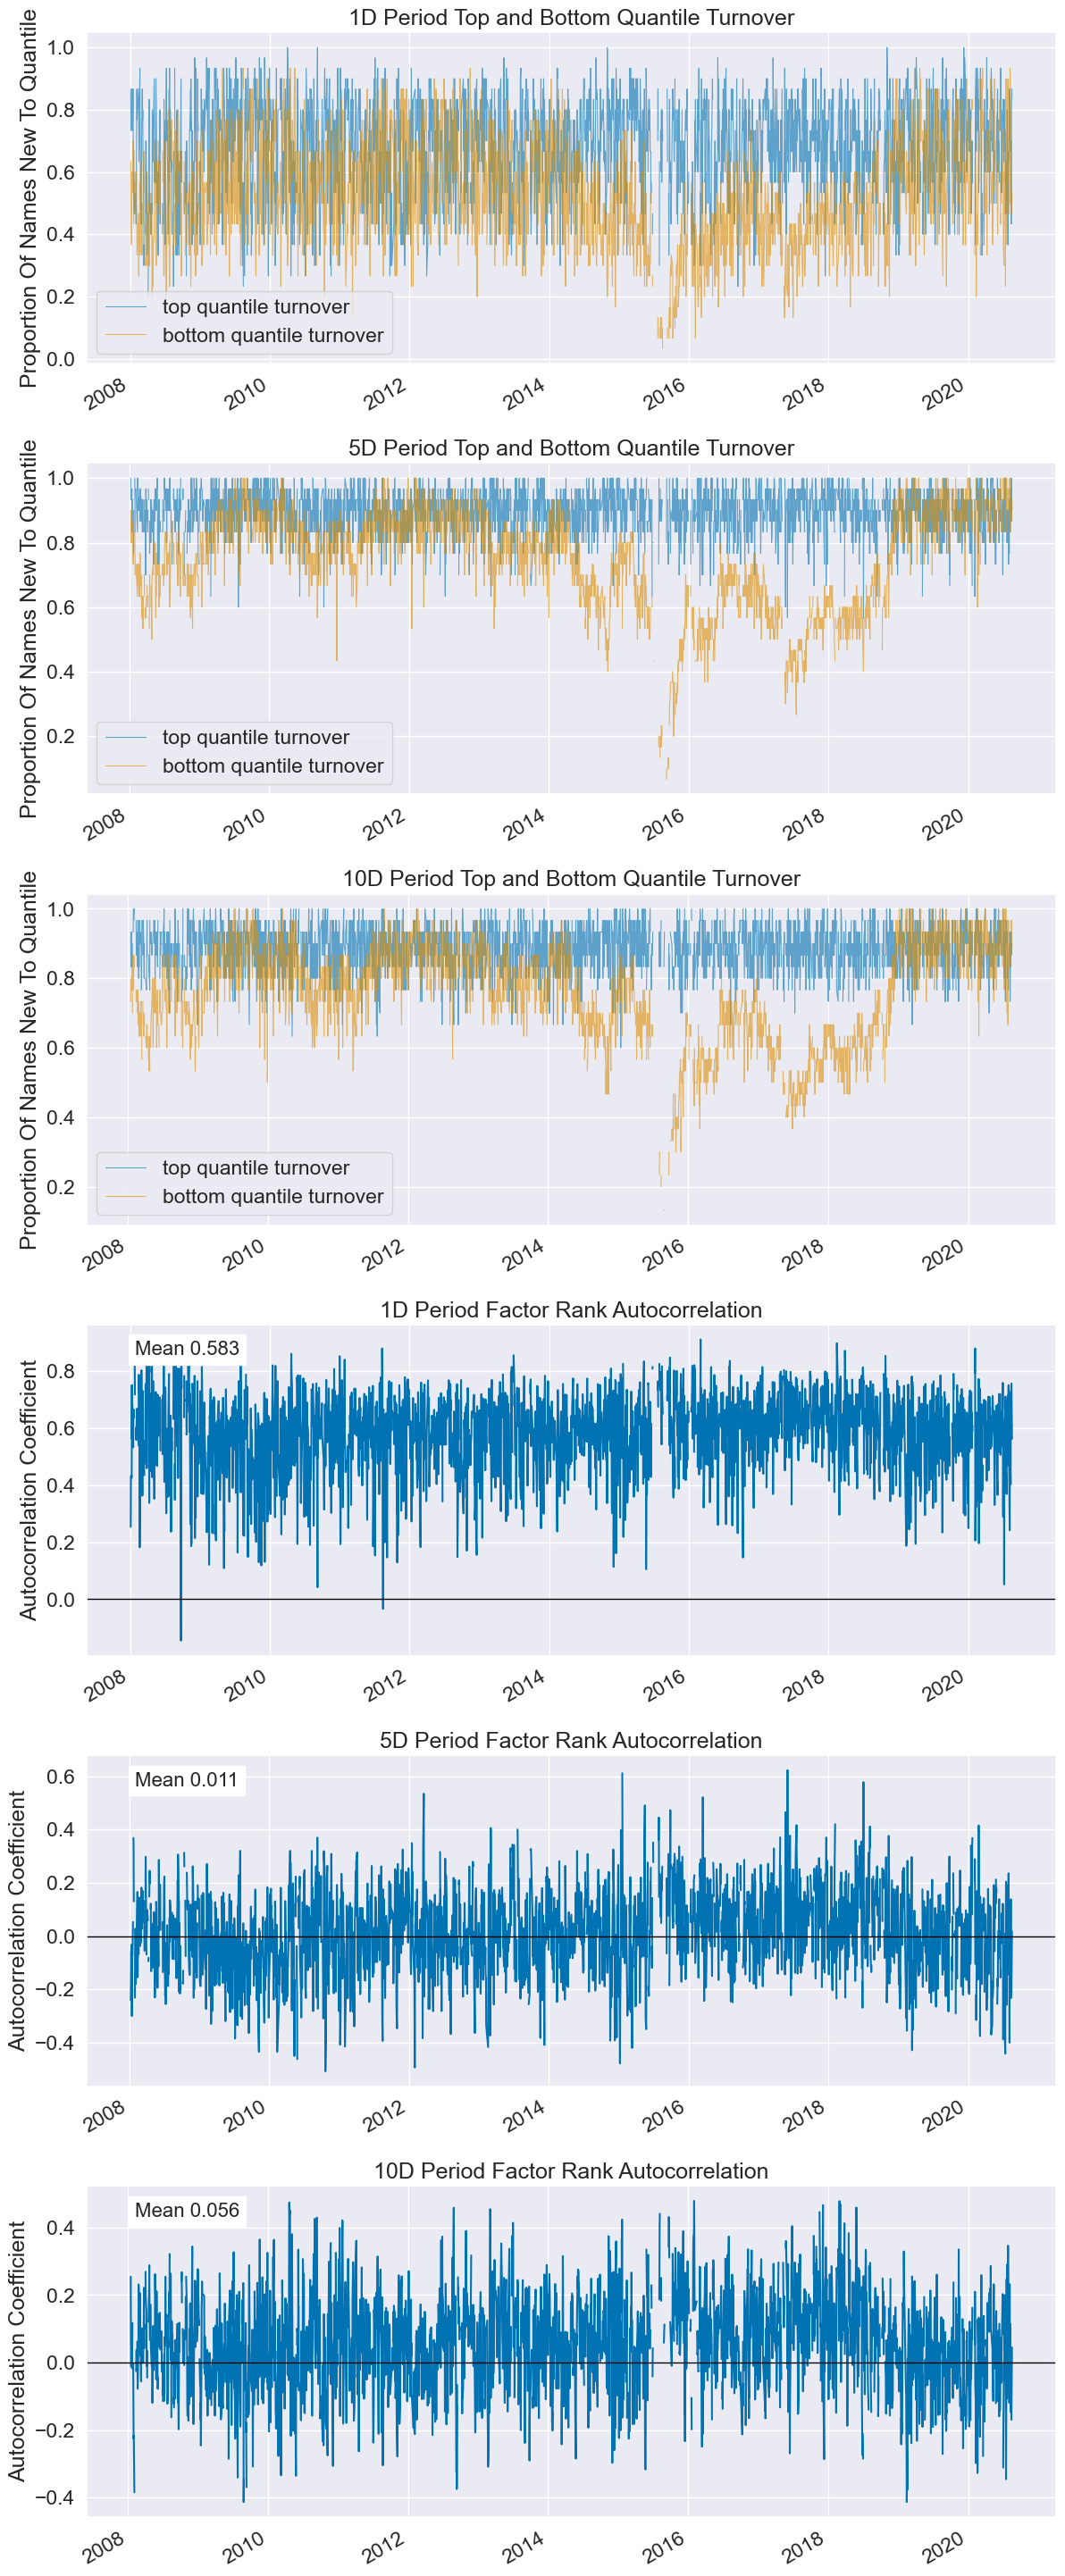

In [13]:
# 特征表现分析
dataset.show_feature_performance("rsv_5")

In [14]:
# 数据预处理
dataset.process_data()

In [15]:
# 保存到文件缓存
lab.save_dataset(name, dataset)

# 模型训练

In [16]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lgb_model import LgbModel

In [17]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [18]:
# 创建模型对象
model: AlphaModel = LgbModel(seed=42)

In [19]:
# 使用数据集训练模型
model.fit(dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.253782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32154
[LightGBM] [Info] Number of data points in the train set: 510579, number of used features: 149
[LightGBM] [Info] Start training from score -0.000000
[1]	train's l2: 0.995305	valid's l2: 0.995563
Training until validation scores don't improve for 50 rounds
[2]	train's l2: 0.994062	valid's l2: 0.994605
[3]	train's l2: 0.992851	valid's l2: 0.993923
[4]	train's l2: 0.991828	valid's l2: 0.993314
[5]	train's l2: 0.990928	valid's l2: 0.992652
[6]	train's l2: 0.990063	valid's l2: 0.992187
[7]	train's l2: 0.989304	valid's l2: 0.991712
[8]	train's l2: 0.988609	valid's l2: 0.991326
[9]	train's l2: 0.987881	valid's l2: 0.991334
[10]	train's l2: 0.987222	valid's l2: 0.991038
[11]	train's l2: 0.986632	valid's l2: 0.9911
[12]	train's l2: 0.98604	valid's l2: 0.990896
[13]	train's l2: 0.985443	valid's l2: 0.9

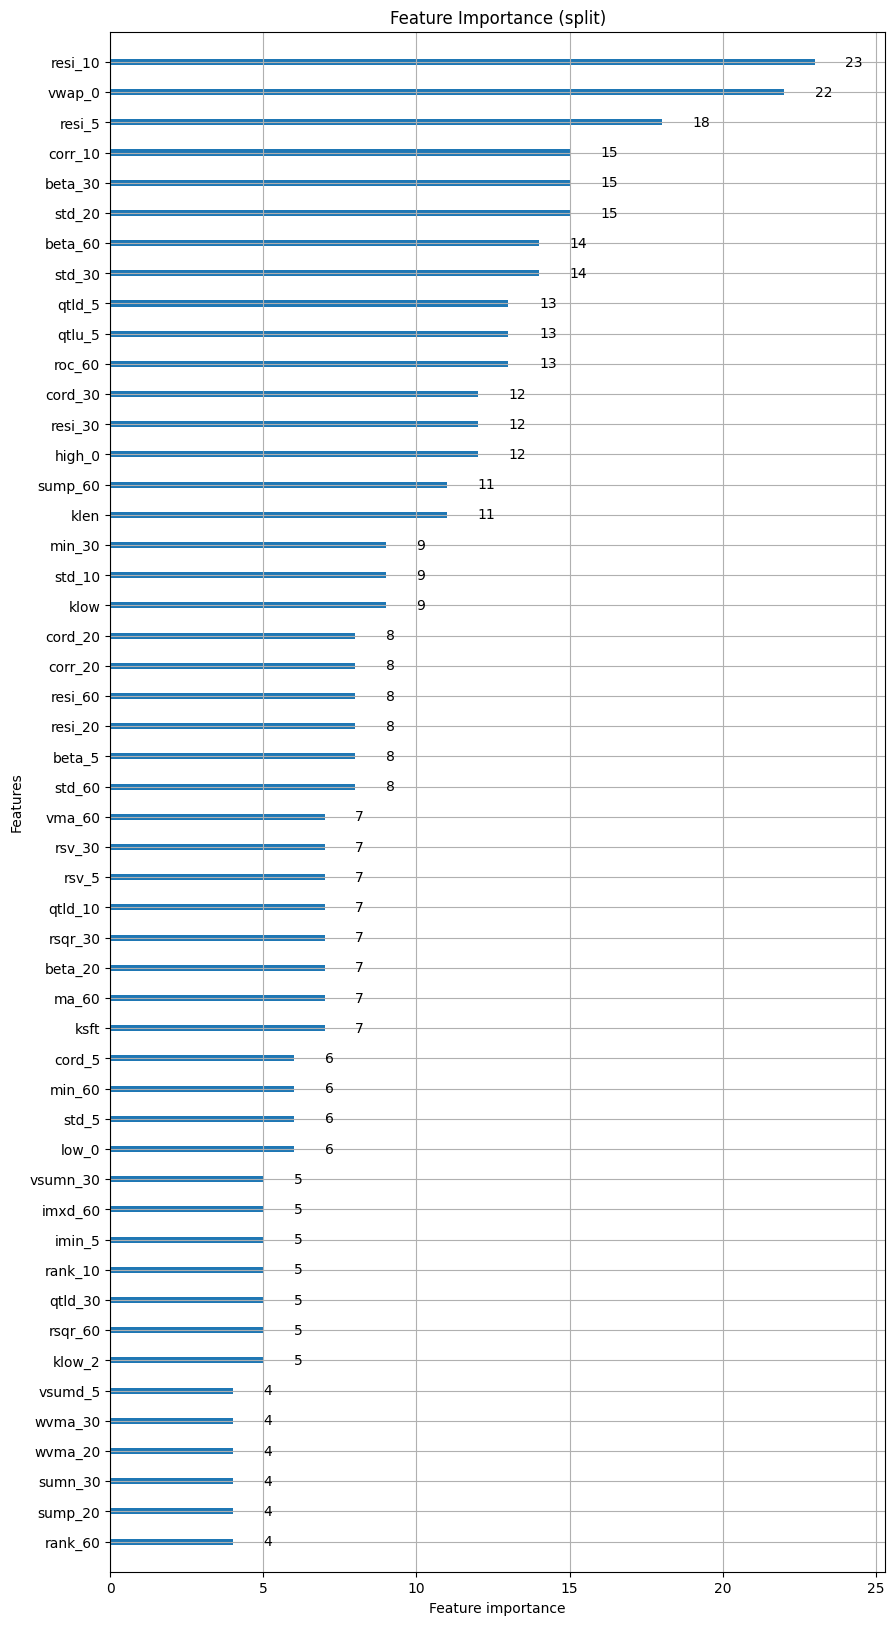

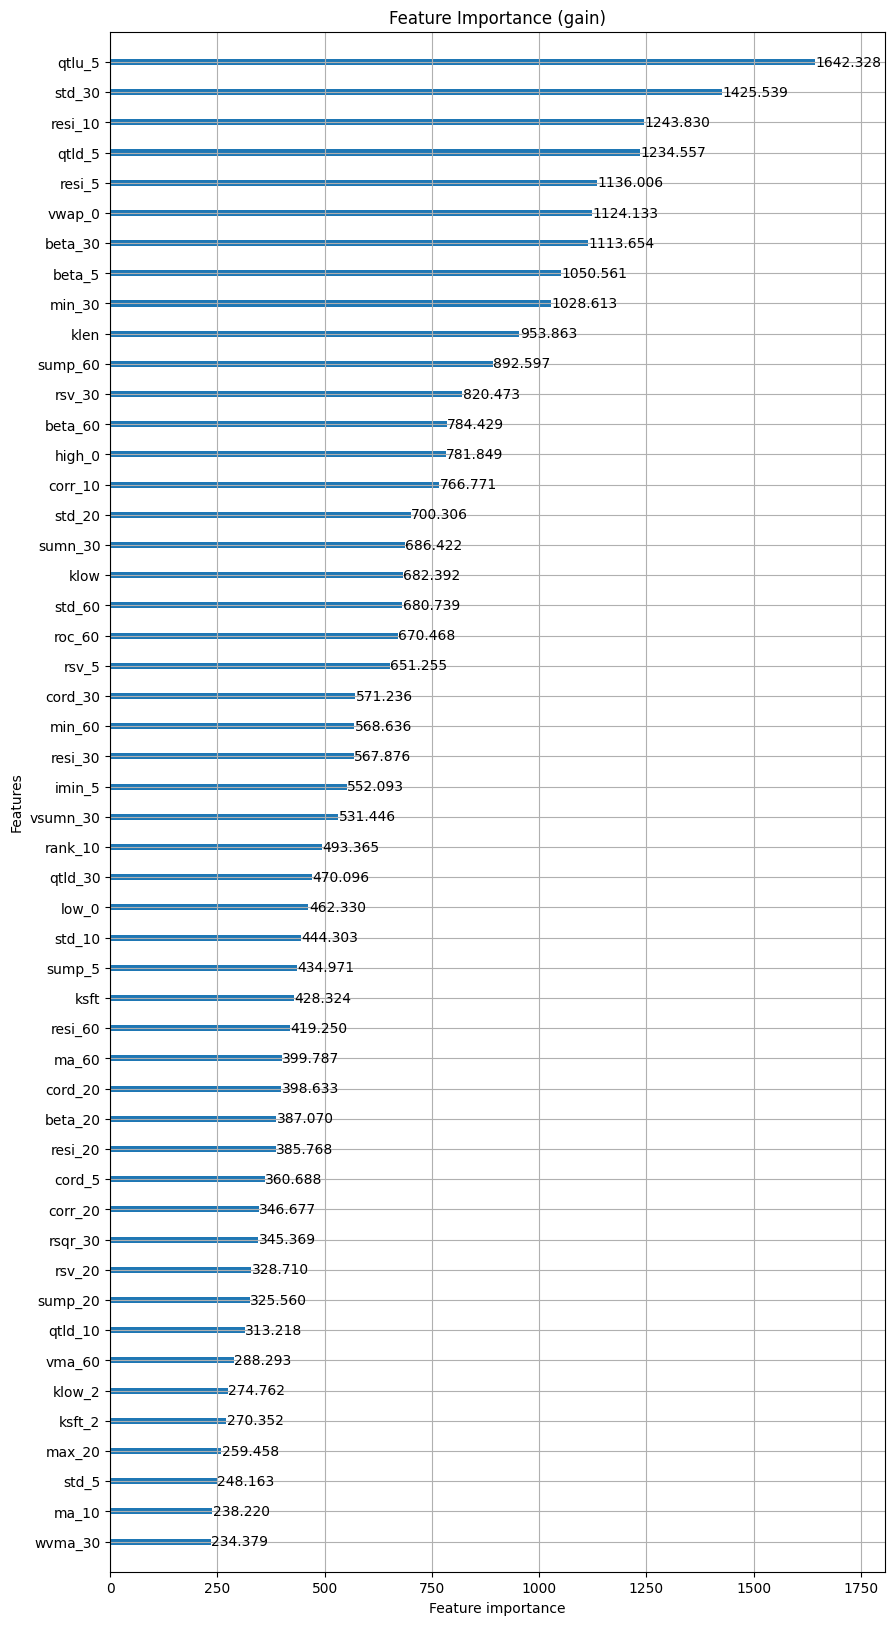

In [20]:
# 查看模型细节
model.detail()

In [21]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [22]:
model: AlphaModel = lab.load_model(name)

In [23]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

factor:
datetime    vt_symbol  
2017-01-03  000001.SZSE   -0.011343
            000002.SZSE    0.023500
            000008.SZSE   -0.034198
            000009.SZSE    0.015898
            000027.SZSE    0.020672
                             ...   
2020-08-31  603799.SSE     0.015116
            603833.SSE     0.034093
            603899.SSE     0.039380
            603986.SSE     0.059667
            603993.SSE     0.000622
Name: signal, Length: 267600, dtype: float64
prices:
vt_symbol   000001.SZSE  000002.SZSE  000008.SZSE  000009.SZSE  000012.SZSE  \
datetime                                                                      
2017-01-03     0.914155     1.296462     7.197271     1.960126     0.900996   
2017-01-04     0.914155     1.303968     7.235848     1.995724     0.912063   
2017-01-05     0.915154     1.308974     7.251215     1.975105     0.916801   
2017-01-06     0.911157     1.290839     7.305159     1.969488     0.899417   
2017-01-09     0.913155     1.292089     7.34

min       max      mean       std  count    count %
factor_quantile                                                          
1               -3.260075  0.012916 -0.091431  0.110690  26467  10.002646
2               -0.781736  0.049943 -0.046775  0.029052  26459   9.999622
3               -0.587935  0.069725 -0.030499  0.026333  26469  10.003401
4               -0.547880  0.085392 -0.018370  0.025703  26491  10.011716
5               -0.526765  0.105596 -0.007899  0.024298  26485  10.009448
6               -0.323404  0.118684  0.002334  0.021713  26442   9.993197
7               -0.136428  0.137062  0.012980  0.022427  26431   9.989040
8               -0.072188  0.179204  0.025635  0.024772  26446   9.994709
9               -0.038612  0.221545  0.043625  0.028228  26454   9.997732
10              -0.006096  3.237717  0.089124  0.067024  26456   9.998488

Returns Analysis


1D      5D     10D
Ann. alpha                                      0.903   0.384   0.193
beta                                            0.037   0.023   0.000
Mean Period Wise Return Top Quantile (bps)     20.374  11.765   6.729
Mean Period Wise Return Bottom Quantile (bps) -21.421 -11.165  -4.975
Mean Period Wise Spread (bps)                  41.795  22.919  11.675

<Figure size 640x480 with 0 Axes>

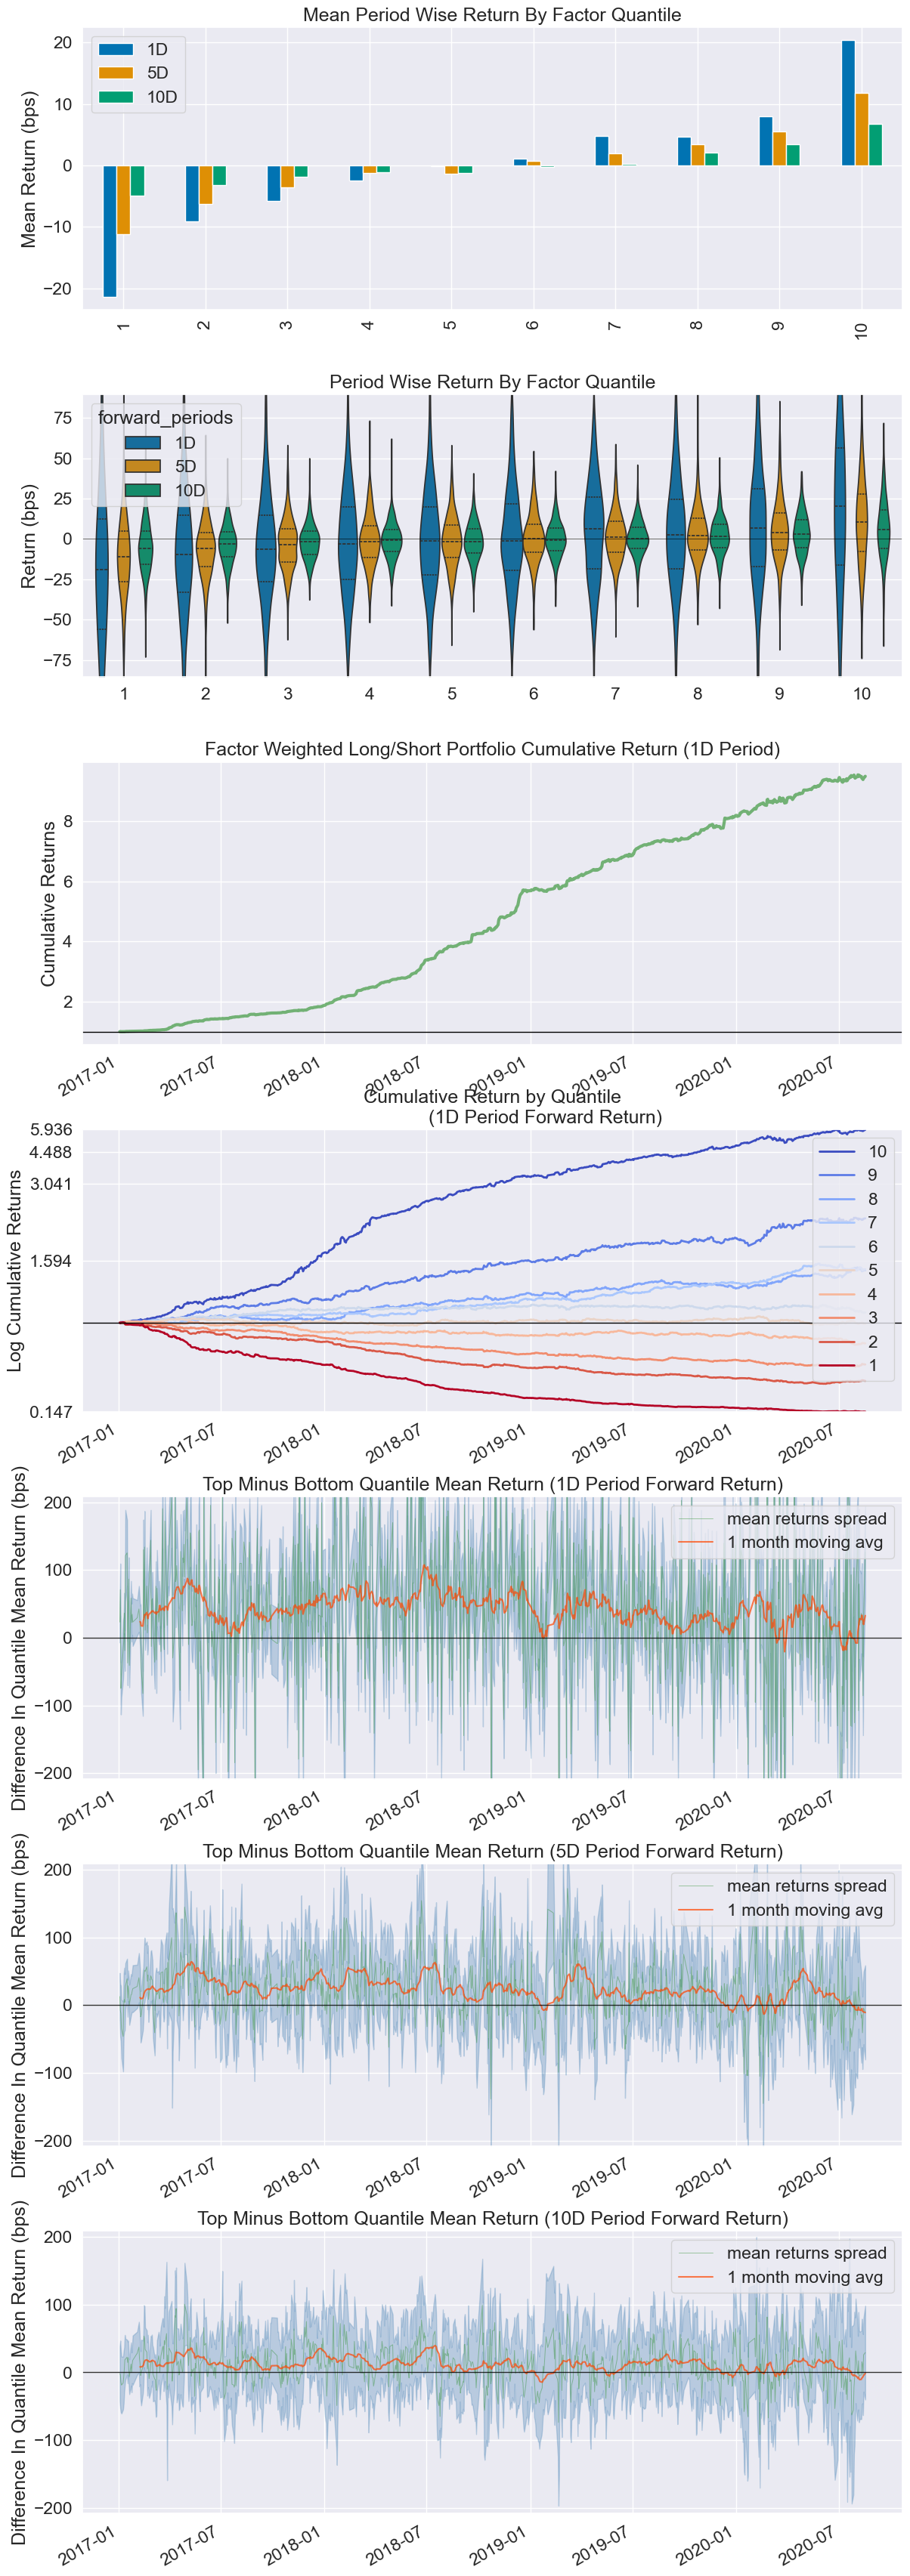

Information Analysis


1D      5D     10D
IC Mean            0.065   0.072   0.053
IC Std.            0.129   0.125   0.115
Risk-Adjusted IC   0.505   0.575   0.463
t-stat(IC)        14.998  17.068  13.743
p-value(IC)        0.000   0.000   0.000
IC Skew            0.176   0.164   0.075
IC Kurtosis        0.677  -0.051  -0.090

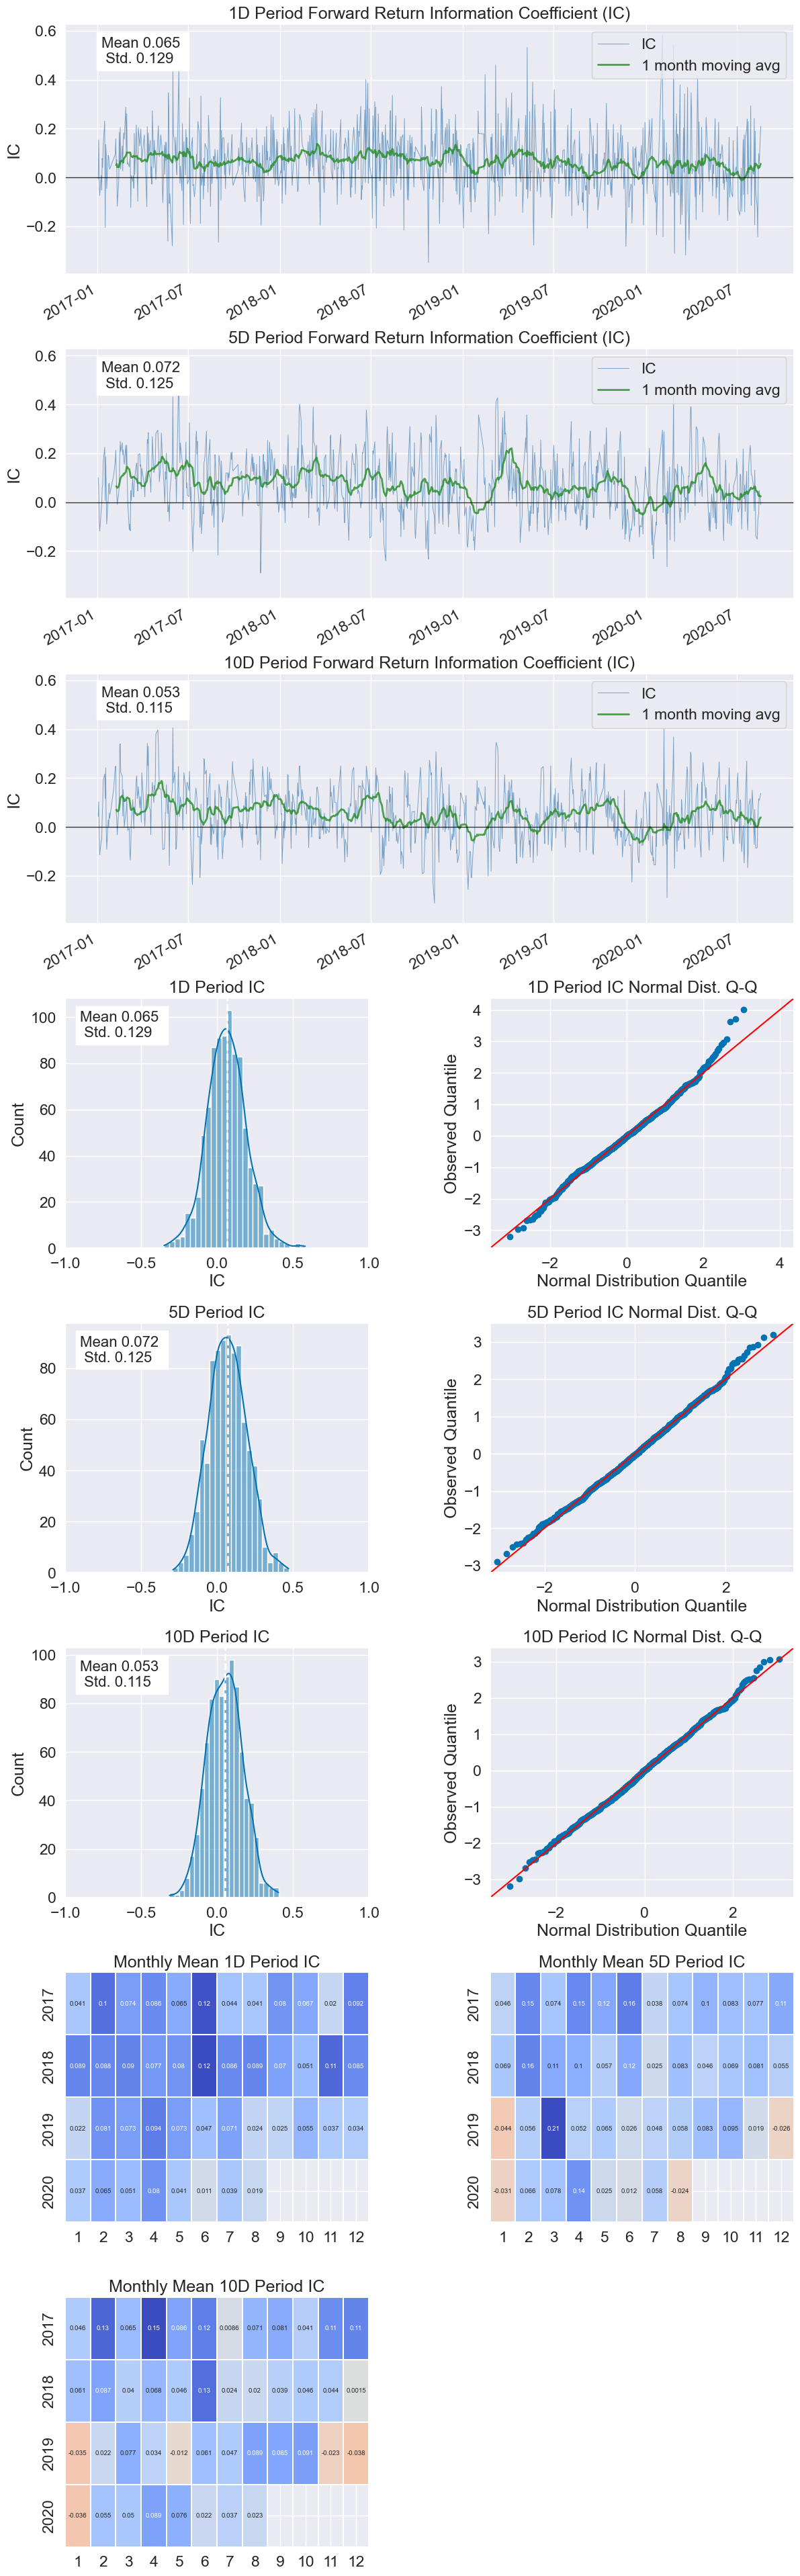

d:\veighna_studio\Lib\site-packages\alphalens\utils.py:932: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.573  0.815  0.843
Quantile 2 Mean Turnover    0.757  0.870  0.885
Quantile 3 Mean Turnover    0.802  0.876  0.886
Quantile 4 Mean Turnover    0.821  0.884  0.888
Quantile 5 Mean Turnover    0.826  0.880  0.887
Quantile 6 Mean Turnover    0.828  0.880  0.887
Quantile 7 Mean Turnover    0.820  0.880  0.884
Quantile 8 Mean Turnover    0.799  0.884  0.888
Quantile 9 Mean Turnover    0.752  0.874  0.884
Quantile 10 Mean Turnover   0.525  0.799  0.810

1D     5D    10D
Mean Factor Rank Autocorrelation  0.566  0.118  0.086

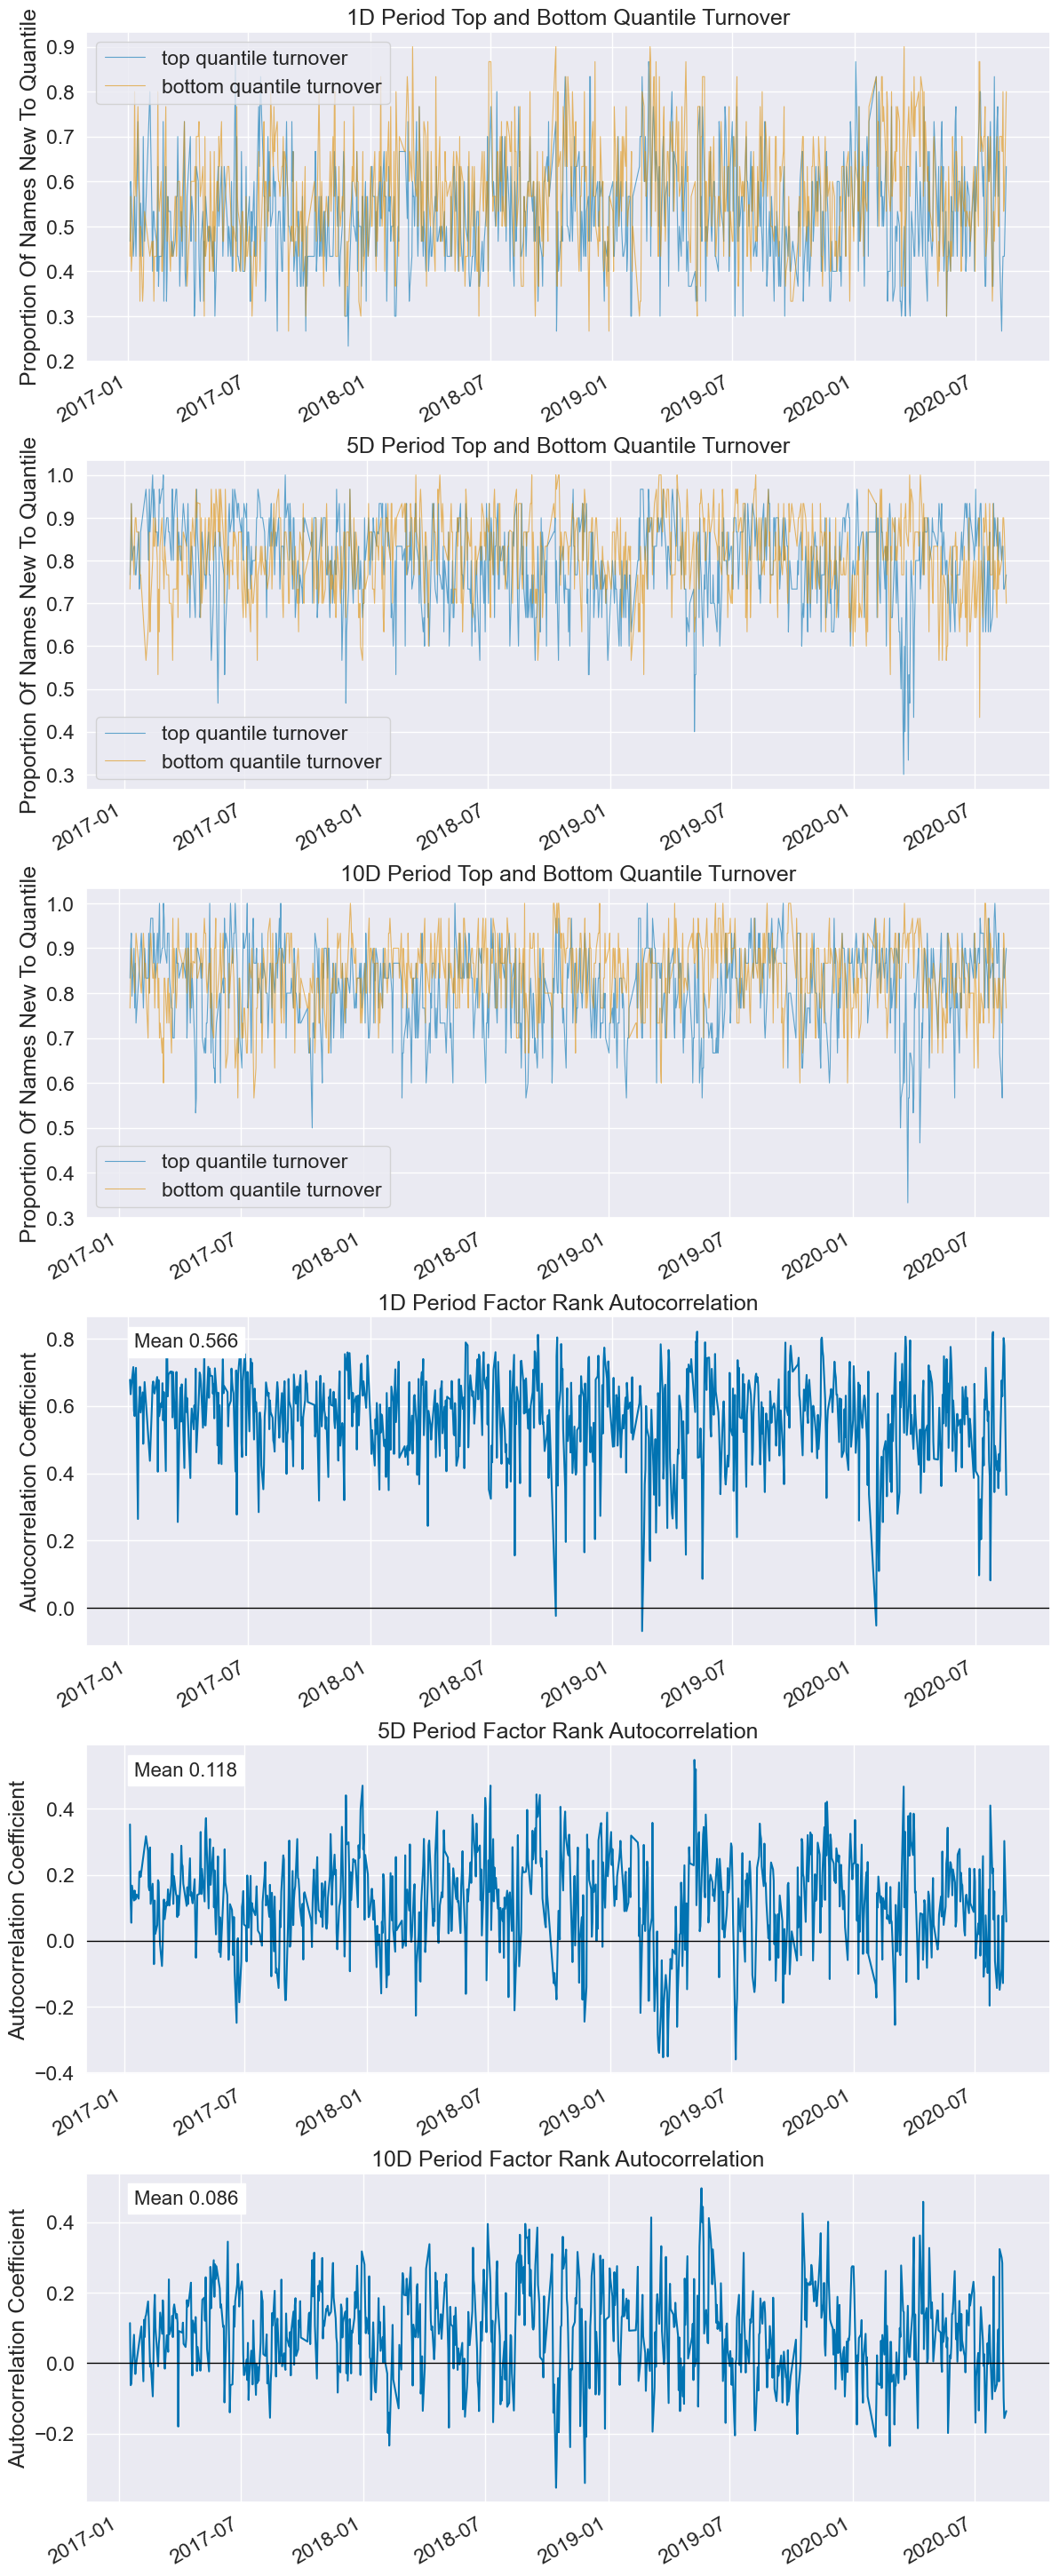

In [24]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [25]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [26]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [27]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [28]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [29]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [30]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-12-24 15:01:41 开始加载历史数据


100%|██████████| 819/819 [00:09<00:00, 84.88it/s] 

2025-12-24 15:01:51 部分合约历史数据为空：['600591.SSE', '601268.SSE', '688271.SSE', '000024.SZSE', '300957.SZSE', '300999.SZSE', '605499.SSE', '300896.SZSE', '601868.SSE', '600938.SSE', '001289.SZSE', '601728.SSE', '601995.SSE', '300919.SZSE', '601299.SSE', '688303.SSE', '301269.SZSE', '600001.SSE', '600941.SSE', '601059.SSE', '300979.SZSE', '000527.SZSE', '300888.SZSE', '600832.SSE', '688187.SSE', '000562.SZSE', '688065.SSE', '605117.SSE', '600087.SSE', '688223.SSE', '600102.SSE', '688041.SSE', '600905.SSE', '601825.SSE', '600631.SSE', '600357.SSE', '300866.SZSE', '600786.SSE']
2025-12-24 15:01:51 所有历史数据加载完成
2025-12-24 15:01:51 策略初始化完成
2025-12-24 15:01:51 开始回放历史数据


2025-12-24 15:01:58 历史数据回放结束
2025-12-24 15:01:58 开始计算逐日盯市盈亏
2025-12-24 15:01:59 逐日盯市盈亏计算完成
2025-12-24 15:01:59 开始计算策略统计指标
2025-12-24 15:01:59 ------------------------------
2025-12-24 15:01:59 首个交易日：  2017-01-03
2025-12-24 15:01:59 最后交易日：  2020-07-31
2025-12-24 15:01:59 总交易日：  871
2025-12-24 15:01:59 盈利交易日：  467
2025-12-24 15:01:59 亏损交易日：  403
2025-12-24 15:01:59 起始资金：  100,000,000.00
2025-12-24 15:01:59 结束资金：  237,319,635.66
2025-12-24 15:01:59 总收益率：  137.32%
2025-12-24 15:01:59 年化收益：  37.84%
2025-12-24 15:01:59 最大回撤:   -42,244,107.20
2025-12-24 15:01:59 百分比最大回撤: -23.17%
2025-12-24 15:01:59 最长回撤天数:   27
2025-12-24 15:01:59 总盈亏：  137,319,635.66
2025-12-24 15:01:59 总手续费：  16,614,361.42
2025-12-24 15:01:59 总成交金额：  22,180,033,794.11
2025-12-24 15:01:59 总成交笔数：  4580
2025-12-24 15:01:59 日均盈亏：  157,657.45
2025-12-24 15:01:59 日均手续费：  19,075.04
2025-12-24 15:01:59 日均成交金额：  25,465,021.58
2025-12-24 15:01:59 日均成交笔数：  5.258323765786453
2025-12-24 15:01:59 日均收益率：  0.11%
2025-12-24 15:01:59 收益标准差： 

In [31]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)